## imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 700, 'display.max_columns', 99)

## Aggregating and making charts (CS)

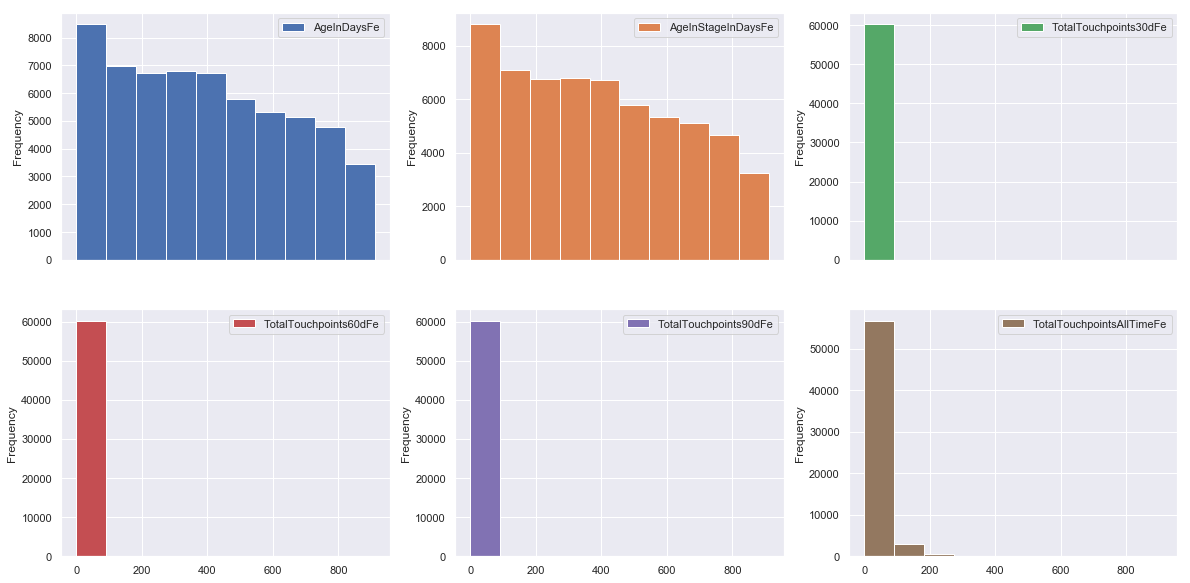

In [165]:
df.iloc[:,2:8].plot(kind='hist', subplots=True, layout=(2,3), figsize=(20,10));

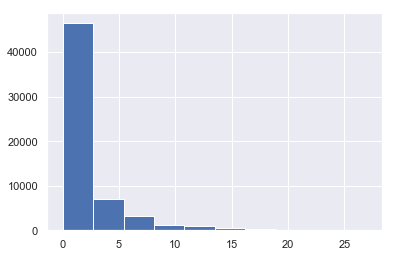

In [144]:
df.TotalTouchpoints30dFe.hist();

In [167]:
rcParams['figure.figsize'] = 10, 5

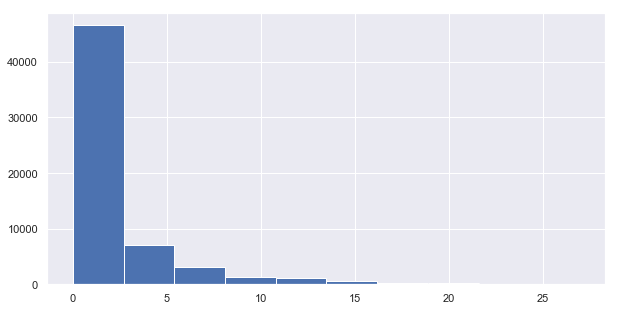

In [169]:
df.TotalTouchpoints30dFe.hist();

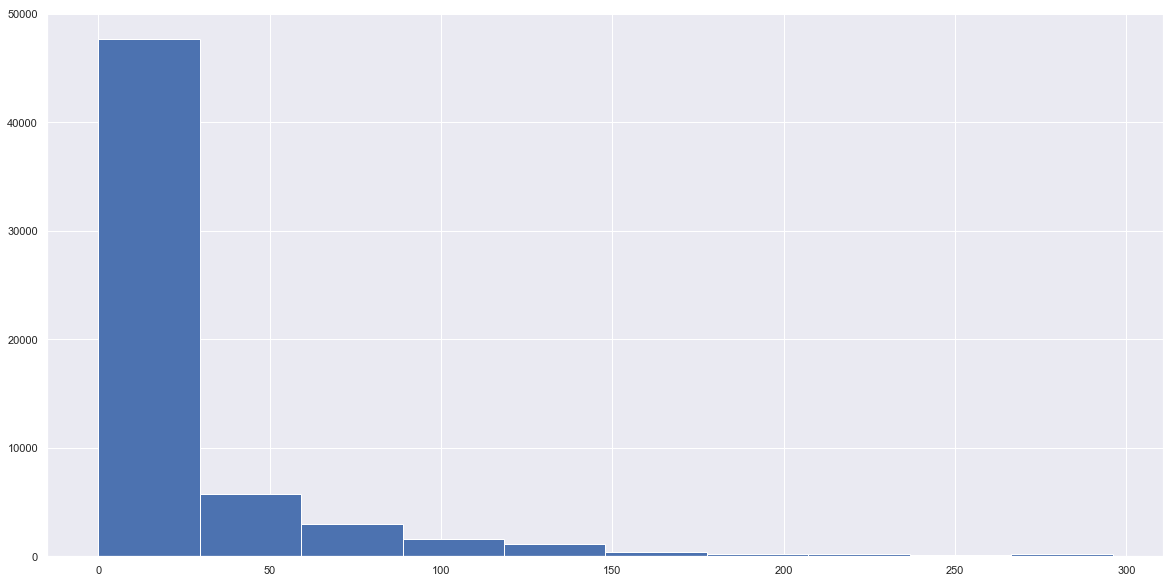

In [163]:
df.TotalTouchpointsAllTimeFe.hist();

In [ ]:
from matplotlib import rcParams

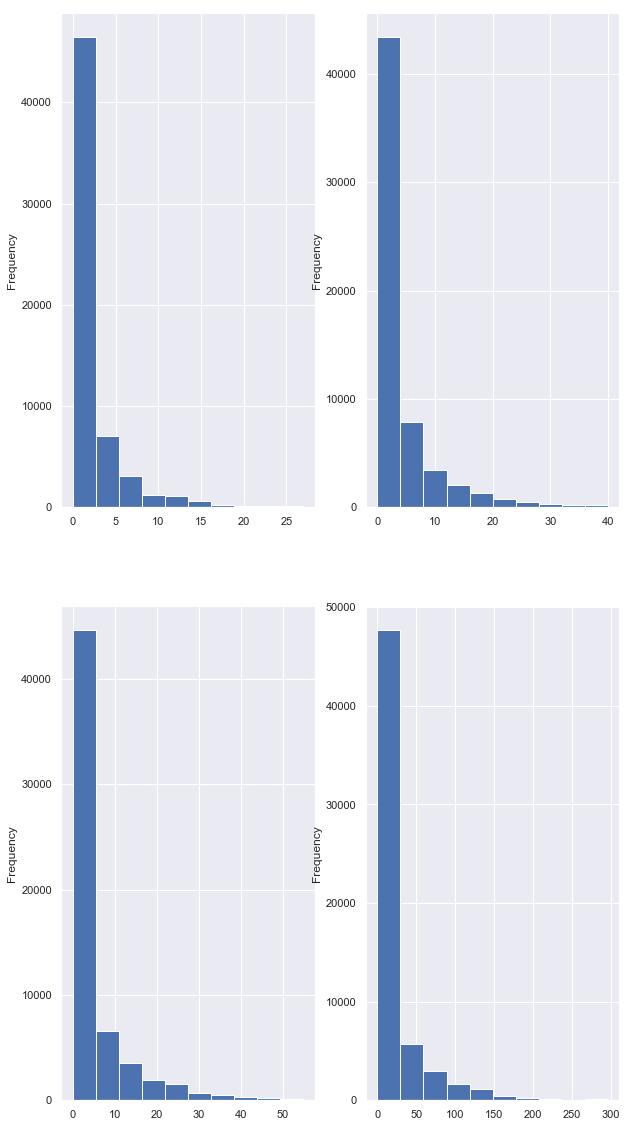

In [155]:
fig, axes = plt.subplots(nrows=2, ncols=2)
rcParams['figure.figsize'] = 20, 10
df.TotalTouchpoints30dFe.plot(kind='hist', ax=axes[0,0])
df.TotalTouchpoints60dFe.plot(kind='hist', ax=axes[0,1])
df.TotalTouchpoints90dFe.plot(kind='hist', ax=axes[1,0])
df.TotalTouchpointsAllTimeFe.plot(kind='hist', ax=axes[1,1]);

In [117]:
clean_cs = pd.read_csv('cleaned_pai_snapshot_c6_d2019-05-15_cs.csv')
clean_cs = clean_cs[sorted(clean_cs)]

In [118]:
clean_cs['activitydate'] = pd.to_datetime(clean_cs["activitydate"])

In [7]:
clean_cs.createddate = pd.to_datetime(clean_cs.createddate)
clean_cs.lastmodifieddate = pd.to_datetime(clean_cs.lastmodifieddate)

In [119]:
clean_cs['lastmodifieddate'] = pd.to_datetime(clean_cs["lastmodifieddate"])
clean_cs['createddate'] = pd.to_datetime(clean_cs["createddate"])

In [120]:
clean_cs['cirrusadv__first_opened__c'] = pd.to_datetime(clean_cs["cirrusadv__first_opened__c"])

In [121]:
clean_cs = clean_cs.sort_values(by=['account_id', 'activitydate', 'lastmodifieddate']).reset_index(drop=True)

There are no columns which are more complete than `id` in identifying multiple rows for one day

In [122]:
x = list(clean_cs)
x.remove('account_id')
x.remove('activitydate')
x = ['account_id', 'activitydate'] + x
clean_cs = clean_cs[x]

Questions to answer:

Does every ID have only one createddate?<br>
Does every ID have only one status?

In [10]:
(clean_cs.groupby('id')['createddate'].nunique() > 1).sum()

0

In [11]:
(clean_cs.groupby('id')['activitydate'].nunique() > 1).sum()

/Users/joshfriedlander/miniconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1045: FutureWarning: In the future, NAT != NAT will be True rather than False.
  inc = np.r_[1, val[1:] != val[:-1]]


93

In [12]:
(clean_cs.groupby('id')['status'].nunique() > 1).sum()

536

In [16]:
base = ['account_id', 'activitydate', 'id', 'createddate', 'lastmodifieddate', 'priority', 'status']

yesware = ['yesware_' + n + '__c' for n in ['activity_time', 'activitytype', 'call_duration_minutes', 'day', 
'emailtype', 'meeting', 'open', 'reply', 'sent', 'template', 'totalcall']] + ['task_sub_type__c', 'task_type__c']

cirrus_adv = ['cirrusadv__' + n + '__c' for n in ['day_activity_created', 'email_opened', 'first_clicked', 
    'first_opened', 'first_reply', 'hour_sent', 'last_clicked', 'last_opened', 'last_reply', 'num_of_clicks', 
            'num_of_replies', 'reply_received', 'time_to_open',]]

In [60]:
a = clean_cs.copy()
a['s'] = (a.createddate - a.activitydate).dt.days.abs()
a['d'] = (a.lastmodifieddate - a.activitydate).dt.days.abs()
a['res'] = a[['s', 'd']].min(axis=1)
a = a[~pd.isnull(a.account_id)]
a = a[~pd.isnull(a.activitydate)]
a = a[a.res>0]
a = a.sort_values(by='res', ascending=False)

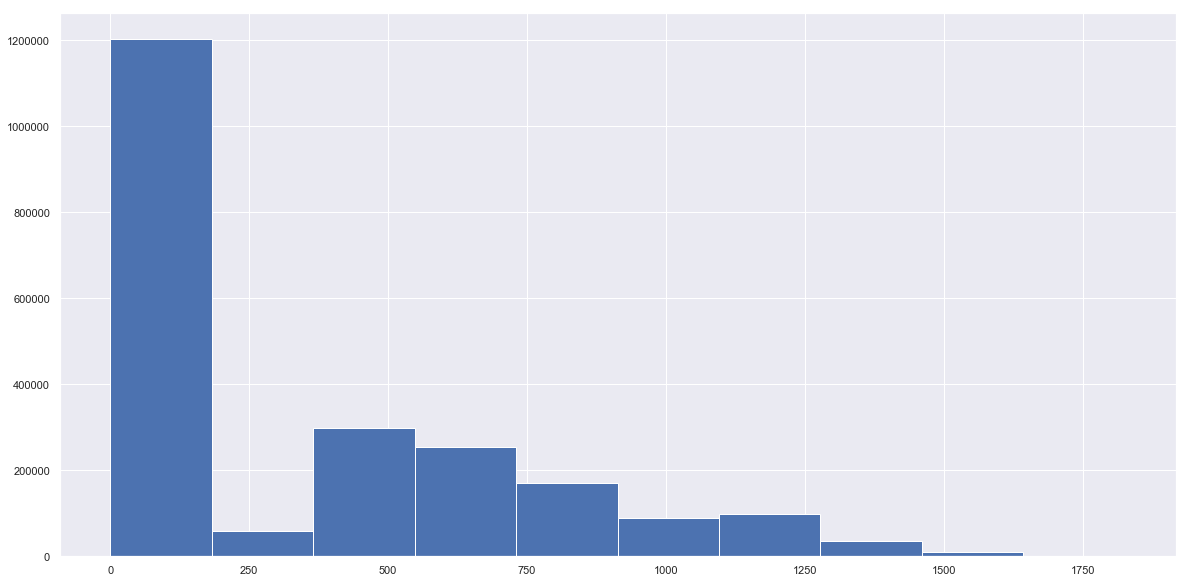

In [27]:
(clean_cs.lastmodifieddate - clean_cs.createddate).dt.days.hist(figsize=(20,10));

In [101]:
clean_cs.priority.value_counts() / clean_cs.shape[0]

Normal    0.988783
High      0.008066
Low       0.002776
Medium    0.000374
Name: priority, dtype: float64

In [106]:
clean_cs.cirrusadv__first_opened__c = pd.to_datetime(clean_cs.cirrusadv__first_opened__c)

In [125]:
a = (clean_cs.cirrusadv__first_opened__c - clean_cs.createddate).dt.seconds

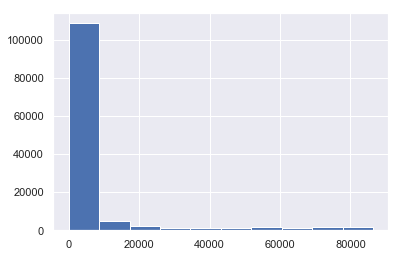

In [126]:
a.hist();

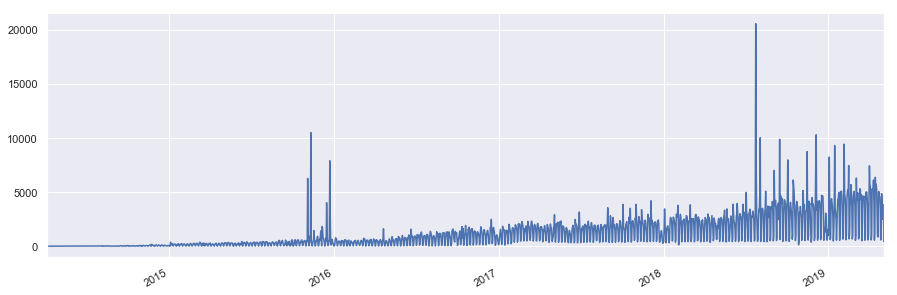

In [81]:
clean_cs.createddate.value_counts().sort_index().plot(figsize=(15,5));

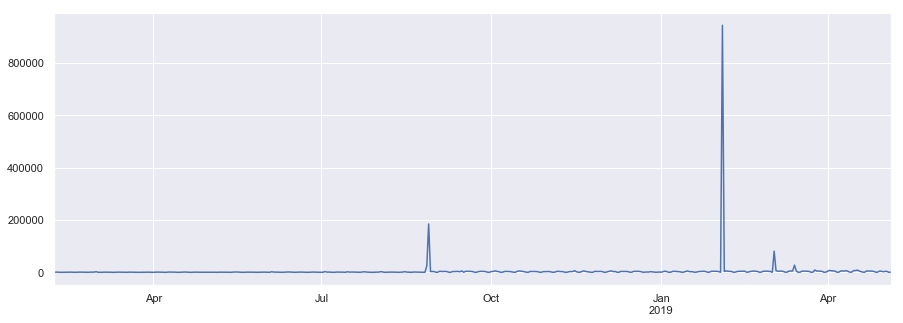

In [80]:
clean_cs.lastmodifieddate.value_counts().sort_index().plot(figsize=(15,5));

In [499]:
clean_cs.status.value_counts().to_frame().style.bar()

,status
Completed,2199040
Not Started,17415
Open,2549
Adopted,321
In-Progress,130
Deleted on Totango,45
No-Go,34
Backlog,26
Not Relevant,24
Not Convinced,20


In [498]:
clean_cs.priority.value_counts().to_frame().style.bar()

,priority
Normal,2194709
High,17904
Low,6162
Medium,831


In [497]:
clean_cs.task_type__c.value_counts().to_frame().style.bar()

,task_type__c
Feature Adoption,1227
General,699
Integration Update,606
Partner Training,599
Meeting,291
Marketing Activity,212
New Integration,164
Sales Enablement,122
Internal Education by Partners,91
Partner Documentation,74
